Árvores de Decisão
==========

Uma árvore de decisão é uma ferramenta de suporte à decisão que usa um modelo de decisões em forma de árvore e suas possíveis consequências. É uma maneira de exibir um algoritmo que contém apenas instruções de controle condicional.

Árvores de decisão são comumente usadas em pesquisa operacional, especificamente em análise de decisão, para ajudar a identificar uma estratégia com maior probabilidade de atingir uma meta, mas também são uma ferramenta popular no aprendizado de máquina.

Um exemplo simples de árvore de decisão é dado abaixo:

![árvore de decisão](tree1.png)

Nessa árvore classifica-se um animal com base em quatro características. Note que em alguns casos não é necessário avaliar as 4 características.

Em Python, podemos representar as folhas como valores simples, tipicamente strings, ou valores booleanos; e representar os nós de decisão como pares ordenados, onde o primeiro elemento indicará a característica usada para a decisão no nó, e o segundo elemento será um dicionário onde as chaves serão os valores possíveis da característica do nó e os valores serão as subarvores de decisão.

Supondo que as características do conjunto de dados que geraram a árvore de decisão da figura acima fossem `respiraar`, `botaovos`, `escamas` e `exoesqueleto`, todas do tipo sim ou não, a nossa representação desta árvore de decisão seria:


In [1]:
t1 = ('respiraar', {False: ('exoesqueleto', {False: "Peise", True: "Crustáceo"}),
                    True: ('botaovos', {False: "Mamífero",
                                        True: ('escamas', {False: "Ave", True: "Reptil"})
                                       })
                   })

Usando esta representação, a função que classifica um item poderia ser definida da forma abaixo:

In [2]:
def simple_tree_classify(tree, item):
    if (type(tree) != tuple):
        return tree
    else:
        attrib = tree[0]
        branches = tree[1]
        key = item[attrib]
        subtree = branches[key]
        return simple_tree_classify(subtree, item)


Como exemplo:

In [3]:
x1 = {'respiraar': True, 'botaovos': True, 'escamas': True, 'exoesqueleto': False}
simple_tree_classify(t1, x1)

'Reptil'

Uma vez que tenhamos uma árvore de decisão, aplicá-la para classificar um registro é trivial. O desfio consiste em, dado um conjunto de dados rotulados, construir a melhor árvore de decisão para classificar estes dados. Tipicamente, “afrouxamos” um pouco este desafio e nos satisfazemos com uma “boa” árvore de decisão (e não necessariamente a melhor).

Há vários algoritmos para construção de árvores de decisão. Apresentaremos aquele que consideramos o mais intuitivo e o mais simples, chamado de ID3.

O algoritmo ID3 utiliza o conceito de **entropia** para representar a quantidade de variação (caos) dentro de um conjunto de dados. Ele usa este conceito para fazer escolhas de quais perguntas fará primeiro, e de como dividirá o conjunto original de dados em subconjuntos (cada pergunta particiona o conjunto em dois ou mais subconjuntos) visando sempre reduzir ao máximo a entropia dentro de cada subconjunto de dados. Explicaremos como é feito o cálculo de entropia mais adiante.

O algorimtos ID3 funciona da seguinte forma:

1. Se todos os items no conjunto de dados tem o mesmo rótulo, então gere uma árvore apenas com uma folha contendo o rótulo em questão.
2. Se não existem mais características que podem ser usados para dividir o conjunto de dados, então crie uma folha com o rótulo que aparece mais vezes no conjunto de dados, ou seja, com o rótulo de maior probabilidade.
3. Caso contrário, para cada característica ainda disponível, calcule o *coeficiente de entropia da partição* gerada por esta característica. 
    1. Selecione a característica que gera o menor *coeficiente de entropia da partição* e particione o conjunto de dados por esta característica.
    2. Adicione um nó de decisão na árvore baseado na característica escolhida.
    3. Para cada ramo do nó de decisão, i.e., para cada subconjunto gerado pela partição do conjunto de dados inicial, repita o procedimento recursivamente calculando a árvore de decisão para este subconjunto.


## Entropia

Seja $S$ um conjunto de dados rotulados. Cada membro de $S$ pertence a uma das classes $C_1, \ldots, C_n$. Se $p_i$ é a proporção de dados da classes $C_i$, então podemos definir a entropia do conjunto $S$ da seguinte forma:

\begin{equation}
H(S) = -p_1\log_2{p_1} - \cdots - p_n\log_2{p_n}
\end{equation}

Utilizare-mos a conveção de que $0\log_2{0} = 0$.

Note que se houver apenas uma classe no conjunto total de dados, a entropia será 0.

Mais especificamente, o comportamento de $-p\log_2{p}$ para $0\leq p\leq 1$ pode ser visto no gráfico abaixo.

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

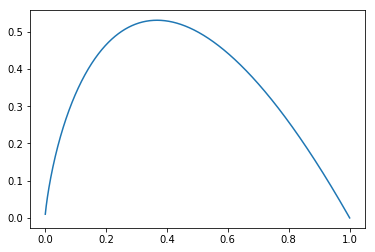

In [5]:
x = np.linspace(0, 1, 1000)[1:]
y = -x * np.log2(x)
plt.plot(x, y);

Assim, vamos definir algumas funções para lidar com a entropia.

In [6]:
def entropy(probabilities):
    """Dada uma série de probabilidade de classes de um conjunto de dados, calcula o valor total da entropia."""
    p = probabilities[probabilities != 0]
    return sum(-p * np.log2(p))

In [7]:
from collections import Counter

def class_probabilities(labels):
    """Dada uma série de labels, calcula a série de probabilidades para cada classes de label."""
    total = len(labels)
    c = Counter(labels)
    return np.array([count/total for count in c.values()])

In [8]:
xs = ['blue', 'blue', 'red', 'green', 'green', 'red', 'blue', 'green']
class_probabilities(xs)

array([0.375, 0.25 , 0.375])

In [9]:
def data_entropy(labels):
    """Dada uma série de labels, calcula o valor total da entropia para o conjunto de dados associado à estes labels."""
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

In [10]:
data_entropy(xs)

1.561278124459133

Para testar esta funções vamos utilizar um dataset de exemplo.

In [11]:
candidates = pd.read_csv('candidates.csv')
candidates

,level,lang,tweets,phd,selected
0,Senior,Java,no,no,False
1,Senior,Java,no,yes,False
2,Mid,Python,no,no,True
3,Junior,Python,no,no,False
4,Junior,R,yes,no,False
5,Junior,R,yes,yes,True
6,Mid,R,yes,yes,True
7,Senior,Python,no,no,False
8,Senior,R,yes,no,True
9,Junior,Python,yes,no,True


O atributo que indica o rótulo é o atributo `selected`, assim podemos calcular a entropia do conjunto de dados como segue:

In [12]:
labels = candidates['selected']
data_entropy(labels)

0.9366673818775625

Ou seja, uma entropia total próxima de 1.

## Entropia de uma Partição

Para construir uma árvore de decisão, cada pergunta faz uma “partição” no conjunto de dados e “descarta” todos os subconjuntos menos um. O que desejamos, é construir uma árvore de decisão que diminua progressivamente a entropia dos subconjuntos restantes. Para isso, utilizaremos a seguinte estratégia:

1. Escolhemos um atributo $x$;
2. Para cada valor $v_i$, $1\leq i\leq m$, do atributo $x$, criamos um subconjunto apenas com os items de $x$ com aquele valor. Chamaremos de $S_i$ o subconjunto de $S$ onde o atributo $x$ tem valor $v_i$.
3. Calcularemo o coeficiente de entropia da partição, calculando a entropia total de cada subconjunto $S_i$ e multiplicando esse valor pela proporção $q_i$ dos dados do subconjunto $S_i$ em relação ao conjunto $S$.

Deste modo, o *coeficiente de entropia de partição* que estamos buscando pode ser definido pela seguinte equação:

\begin{equation}
H = q_1 H(S_1) + \cdots + q_m H(S_m)
\end{equation}



In [13]:
def partition_by(df, part_col):
    """Dado um conjunto de dados e uma coluna, realiza a partição do conjunto
    em subconjuntos de acordo com os valores únicos continos na coluna e retorna
    a lista de subconjuntos de dados gerada pela partição."""
    subsets = dict()
    for k in df[part_col].unique():
        subset = df[df[part_col] == k]
        subsets[k] = subset
    return subsets

Por exemplo, calculando a partição do nosso dataset de exemplo por `lang` temos:

In [14]:
subsets = partition_by(candidates, 'lang')
for k in subsets:
    print("Partição para lang = %s" % k)
    print(subsets[k])

Partição para lang = Java
     level  lang tweets  phd  selected
0   Senior  Java     no   no     False
1   Senior  Java     no  yes     False
12     Mid  Java    yes   no      True
Partição para lang = Python
     level    lang tweets  phd  selected
2      Mid  Python     no   no      True
3   Junior  Python     no   no     False
7   Senior  Python     no   no     False
9   Junior  Python    yes   no      True
10  Senior  Python    yes  yes      True
11     Mid  Python     no  yes      True
13  Junior  Python     no  yes      True
Partição para lang = R
    level lang tweets  phd  selected
4  Junior    R    yes   no     False
5  Junior    R    yes  yes      True
6     Mid    R    yes  yes      True
8  Senior    R    yes   no      True
Partição para lang = Scala
     level   lang tweets  phd  selected
14  Junior  Scala     no  yes      True
15  Junior  Scala    yes  yes      True
16     Mid  Scala     no   no     False


In [15]:
def partition_entropy(subsets, label_col):
    """Calcula o coeficiente de entropia para a partição do conjunto de 
    dados cujos subconjuntos estão em `subsets`, utilizando a coluna
    `label_col` como a coluna contendo os labels."""
    acc = 0
    total = sum([len(s) for s in subsets])
    for subset in subsets:
        q = len(subset)/total
        h = data_entropy(subset[label_col])
        acc = acc + q * h
    return acc

Com a função `partition_entropy` definida, podemos calcular o coeficiente de entropia de partição para cada um dos atributos do nosso dataset de exemplo.

In [16]:
for col in ['level', 'lang', 'tweets', 'phd']:
    subsets = partition_by(candidates, col)
    g = partition_entropy(subsets.values(), 'selected')
    print("Entropia de partição para `%s` => %f" % (col, g))

Entropia de partição para `level` => 0.853308
Entropia de partição para `lang` => 0.870396
Entropia de partição para `tweets` => 0.780482
Entropia de partição para `phd` => 0.780482


Para automatizar mais o processo:

In [17]:
def partition_entropy_by(df, part_col, label_col):
    subsets = partition_by(df, part_col)
    return partition_entropy(subsets.values(), label_col)

In [18]:
for col in ['level', 'lang', 'tweets', 'phd']:
    g = partition_entropy_by(candidates, col, 'selected')
    print("Entropia de partição para `%s` => %f" % (col, g))

Entropia de partição para `level` => 0.853308
Entropia de partição para `lang` => 0.870396
Entropia de partição para `tweets` => 0.780482
Entropia de partição para `phd` => 0.780482


Para construir uma árvore de decisão (utilizando este algoritmo, que se chama ID3) escolheríamos o atributo que gera a partição com o menor coeficiente de entropia &ndash; neste caso o atributo `lang` &ndash; e repetiríamos este processo para cada um dos subconjuntos gerados pela partição, recursivamente.

## Construindo a Árvore de Decisão



Nossa função em Python para construir a árvore de decisão será a transcrição quase literal da definição do algorimto ID3.

In [19]:
def build_tree_id3(df, features, label_col):
    labels = df[label_col].unique()
    if len(labels) == 1:
        return labels[0]
    elif len(features) == 0:
        c = Counter(labels)
        return c.most_common(1)[0][0]
    else:
        best = min(features, key=lambda k: partition_entropy_by(df, k, label_col))
        partitions = partition_by(df, best)
        new_features = [k for k in features if k != best]
        branches = {key: build_tree_id3(subset, new_features, label_col) for (key, subset) in partitions.items()}
        return (best, branches)

In [20]:
candidate_tree = build_tree_id3(candidates, ['level', 'lang', 'tweets', 'phd'], 'selected')
candidate_tree

('tweets',
 {'no': ('level',
   {'Senior': False,
    'Mid': ('lang', {'Python': True, 'Scala': False}),
    'Junior': ('phd', {'no': False, 'yes': True})}),
  'yes': ('level',
   {'Junior': ('lang',
     {'R': ('phd', {'no': False, 'yes': True}),
      'Python': True,
      'Scala': True}),
    'Mid': True,
    'Senior': True})})

Vamos testar nossa árvore de decisão.

In [21]:
candidates['predicted'] = [simple_tree_classify(candidate_tree, candidates.iloc[i]) for i in range(len(candidates))]
candidates

,level,lang,tweets,phd,selected,predicted
0,Senior,Java,no,no,False,False
1,Senior,Java,no,yes,False,False
2,Mid,Python,no,no,True,True
3,Junior,Python,no,no,False,False
4,Junior,R,yes,no,False,False
5,Junior,R,yes,yes,True,True
6,Mid,R,yes,yes,True,True
7,Senior,Python,no,no,False,False
8,Senior,R,yes,no,True,True
9,Junior,Python,yes,no,True,True


# Árvores de Decisão no SciKit-learn

Claro que a implementação acima se destina mais a entender como funciona uma árvore de decisão do que para uso prático.

Para situação prática é recomendável utilizar a implementação disponível no SciKit-Learn para [Árvores de Decisão](https://scikit-learn.org/stable/modules/tree.html).

Além de muito mais eficiente, ela é muito mais flexível e funciona inclusive para atributos numéricos.

A implementação do SciKit-learn está disponível através da classes [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).


In [22]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(['Junior', 'Mid', 'Senior'])
candidates['ilevel'] = enc.transform(candidates['level'])
enc.fit(['Java', 'Python', 'R', 'Scala'])
candidates['ilang'] = enc.transform(candidates['lang'])
enc.fit(['no', 'yes'])
candidates['itweets'] = enc.transform(candidates['tweets'])
candidates['iphd'] = enc.transform(candidates['phd'])
enc.fit([False, True])
candidates['iselected'] = enc.transform(candidates['selected']) 
candidates

,level,lang,tweets,phd,selected,predicted,ilevel,ilang,itweets,iphd,iselected
0,Senior,Java,no,no,False,False,2,0,0,0,0
1,Senior,Java,no,yes,False,False,2,0,0,1,0
2,Mid,Python,no,no,True,True,1,1,0,0,1
3,Junior,Python,no,no,False,False,0,1,0,0,0
4,Junior,R,yes,no,False,False,0,2,1,0,0
5,Junior,R,yes,yes,True,True,0,2,1,1,1
6,Mid,R,yes,yes,True,True,1,2,1,1,1
7,Senior,Python,no,no,False,False,2,1,0,0,0
8,Senior,R,yes,no,True,True,2,2,1,0,1
9,Junior,Python,yes,no,True,True,0,1,1,0,1


In [23]:
from sklearn.tree import DecisionTreeClassifier

t2 = DecisionTreeClassifier()
t2 = t2.fit(candidates[['ilevel', 'ilang', 'itweets', 'iphd']], candidates['iselected'])
candidates['ipredicted'] = t2.predict(candidates[['ilevel', 'ilang', 'itweets', 'iphd']])

In [24]:
candidates['ipredicted'] = t2.predict(candidates[['ilevel', 'ilang', 'itweets', 'iphd']])
candidates

,level,lang,tweets,phd,selected,predicted,ilevel,ilang,itweets,iphd,iselected,ipredicted
0,Senior,Java,no,no,False,False,2,0,0,0,0,0
1,Senior,Java,no,yes,False,False,2,0,0,1,0,0
2,Mid,Python,no,no,True,True,1,1,0,0,1,1
3,Junior,Python,no,no,False,False,0,1,0,0,0,0
4,Junior,R,yes,no,False,False,0,2,1,0,0,0
5,Junior,R,yes,yes,True,True,0,2,1,1,1,1
6,Mid,R,yes,yes,True,True,1,2,1,1,1,1
7,Senior,Python,no,no,False,False,2,1,0,0,0,0
8,Senior,R,yes,no,True,True,2,2,1,0,1,1
9,Junior,Python,yes,no,True,True,0,1,1,0,1,1


In [25]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(t2, out_file=None, feature_names=['level', 'lang', 'tweets', 'phd'])

graph = graphviz.Source(dot_data) 
graph.render("candidates") 

'candidates.pdf'